# Logistic Regression


In this part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and
you want to determine each applicant's chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant's scores on two exams and the admissions
decision.
Your task is to build a classification model that estimates an applicant's
probability of admission based the scores from those two exams.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

Load our dataset

In [2]:
path = open(r'C:\Users\Igor Kolasa\ML-exercises\ml_by_stanford_coursera\data\ex2data1.txt')
data = pd.read_csv(path, names=['Exam_1_Score', 'Exam_2_Score', 'Admission_Decision'])
data.head()

,Exam_1_Score,Exam_2_Score,Admission_Decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Let's plot our dataset

Text(0, 0.5, 'Exam_2_Score')

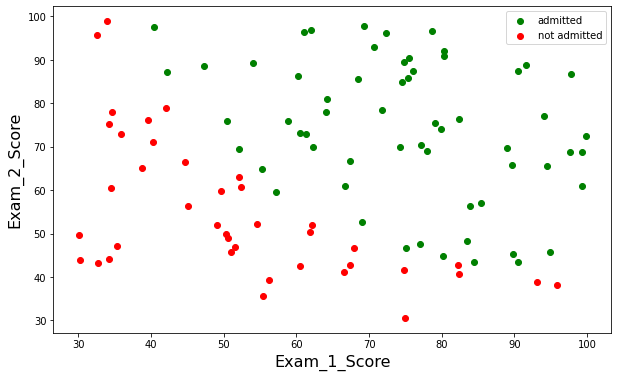

In [3]:
admitted = data.loc[data['Admission_Decision'] == 1]
not_admitted = data.loc[data['Admission_Decision'] == 0]

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(admitted['Exam_1_Score'], admitted['Exam_2_Score'], c='green', label='admitted')
ax.scatter(not_admitted['Exam_1_Score'], not_admitted['Exam_2_Score'], c='red', label='not admitted')
ax.legend()

ax.set_xlabel('Exam_1_Score', fontsize=16)
ax.set_ylabel("Exam_2_Score", fontsize=16)

Let's split our dataset into X matrix containing exam results and y vector of training labels
 

In [4]:
X = data.iloc[:,0:2]
y = data.iloc[:,2]

# Add intercept term to X
X.insert(0, 'Ones', 1)

# Convert dataframes to numpy arrays
X = X.to_numpy() # (100, 3)
y = y.to_numpy() # (100,)

# Convert 1D array y to 2D array (column vector)
y = np.reshape(y, (-1, 1)) # (100, 1)

# Initialize fitting parameters
theta = np.zeros((3,1)) # (3, 1)

print(X.shape)
print(y.shape)
print(theta.shape)

(100, 3)
(100, 1)
(3, 1)


Implement sigmoid function


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Implement logistic regression cost function

In [6]:
def compute_cost(theta, X, y):

    # Number of training examples
    m = X.shape[0]

    # Sigmoid function input
    z = np.dot(X, theta)

    # Hypothesis (sigmoid function)
    h = sigmoid(z)

    # Cost function
    J = (np.dot(-y.T, np.log(h)) - np.dot((1-y).T, np.log(1-h))) / m
    
    return J.item() 

In [7]:
J = compute_cost(theta, X, y)
print(J)

0.6931471805599453


I will compare two optimization algorithms: gradient descent implemented by myself and SciPy's truncated newton (TNC) implementation.

First I will search for optimal parameters using gradient descent

In [8]:
def gradient_descent(X, y, theta, l_rate, num_iters):
    # List of costs after each gradient descent step
    J_list = []

    # number of training examples 
    m = X.shape[0]

    for i in range(num_iters):
        # Sigmoid function input
        z = np.dot(X, theta)

        # Hypothesis (sigmoid function)
        h = sigmoid(z)

        error = h - y
        theta = theta - l_rate * np.dot(X.T, error) / m

        J_list.append(compute_cost(theta, X, y))

    return (theta, J_list)

In [9]:
l_rate = 0.001
num_iters = 60000
theta, J_list = gradient_descent(X, y, theta, l_rate, num_iters)
print(theta)

[[-3.29639401]
 [ 0.03397985]
 [ 0.02627297]]


Plot the convergence graph

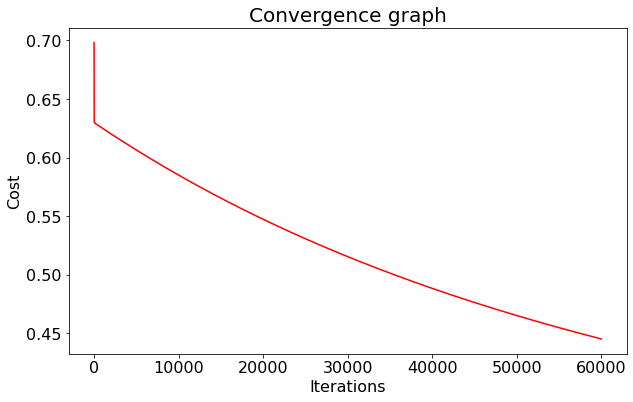

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.plot(range(num_iters), J_list, c='red')

ax.set_title('Convergence graph', fontsize=20)
ax.set_xlabel('Iterations', fontsize=16)
ax.set_ylabel("Cost", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

The cost for parameters learned with gradient descent:

In [11]:
J = compute_cost(theta, X, y)
J

0.44511880949607097

Now let's learn our parameters using SciPy's optimize

We need a function that computes the gradient


In [12]:
def gradient(theta, X, y):
    # Must reshape theta back to 2D because fmin_tnc 
    # truncates it to 1D
    theta = np.reshape(theta, (-1, 1)) # (3, 1) 

    grad = np.zeros_like(theta)

    # Number of training examples
    m = X.shape[0]

    # Sigmoid function input
    z = np.dot(X, theta)

    # Hypothesis (sigmoid function)
    h = sigmoid(z)

    error = h - y
    
    grad = np.dot(X.T, error) / m
    
    return grad

In [13]:
import scipy.optimize as opt

# reinitialize parameters to zeros
theta = np.zeros((3,1)) # (3, 1)

result = opt.fmin_tnc(func=compute_cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131846,   0.20623159,   0.20147148]), 36, 0)

Let's compute cost for parameters learned by SciPy's fmin_tnc function

In [14]:
theta = result[0]
J = compute_cost(theta, X, y)
J

0.20349770158947536

As we can see the cost computed with TNC is over two times lower than that computed with my gradient descent.

We can now use our final theta to plot the decision boundary on our training data.


Text(0, 0.5, 'Exam_2_Score')

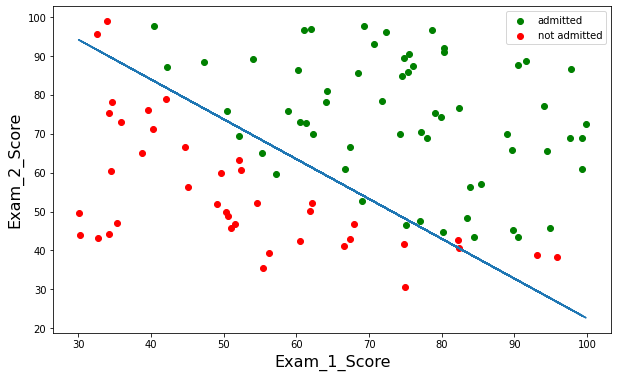

In [15]:
# Computing decision boundary
boundary_vals = [-(theta[0]/theta[2]) - (theta[1]/theta[2])*x for x in data['Exam_1_Score']]

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(admitted['Exam_1_Score'], admitted['Exam_2_Score'], c='green', label='admitted')
ax.scatter(not_admitted['Exam_1_Score'], not_admitted['Exam_2_Score'], c='red', label='not admitted')
ax.plot(data['Exam_1_Score'], boundary_vals)
ax.legend()

ax.set_xlabel('Exam_1_Score', fontsize=16)
ax.set_ylabel("Exam_2_Score", fontsize=16)

Let's compute the training set accuracy for our model

In [16]:
def predict(theta, X):

    z = np.dot(X, theta)
    p = np.where(z > 0.5, 1, 0)
    return p  

In [17]:
p = predict(theta, X)
p = np.reshape(p, (-1, 1)) 

train_accuracy = np.mean(p == y) * 100
print('Train Accuracy: {train_accuracy}%'.format(train_accuracy=train_accuracy))

Train Accuracy: 89.0%


Keep in mind this is a training set accuracy, so this number is likely higher than the true performance of our classifier. We should use test set to get a true approximation of the accuracy.

# Regularized Logistic Regression

In this part of the exercise, you will implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assur-
ance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.
Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.


Load our dataset

In [18]:
path = open(r'C:\Users\Igor Kolasa\ML-exercises\ml_by_stanford_coursera\data\ex2data2.txt')
data = pd.read_csv(path, names=['Test_1', 'Test_2', 'Accepted'])
data.head()

,Test_1,Test_2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Let's visualize our data

Text(0, 0.5, 'Test_2')

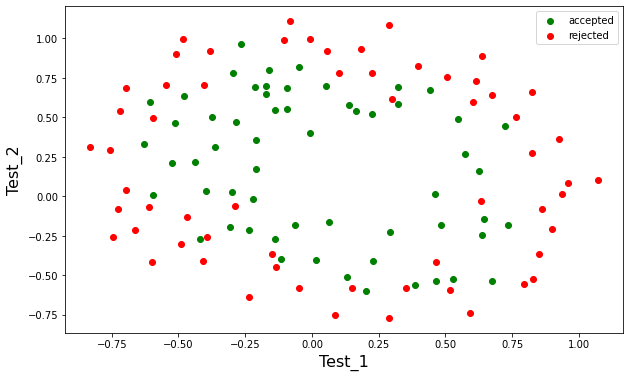

In [19]:
accepted = data.loc[data['Accepted'] == 1]
rejected = data.loc[data['Accepted'] == 0]

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(accepted['Test_1'], accepted['Test_2'], c='green', label='accepted')
ax.scatter(rejected['Test_1'], rejected['Test_2'], c='red', label='rejected')
ax.legend()

ax.set_xlabel('Test_1', fontsize=16)
ax.set_ylabel('Test_2', fontsize=16)

We split our dataset as we did previously, but we must notice that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-
forward application of logistic regression will not perform well on this dataset
since logistic regression will only be able to find a linear decision boundary.
One way to fit the data better is to create more features from each data
point. We will write a function that maps the features into polynomial terms of x1 and x2 first.

In [20]:
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    
    return res

In [21]:
X = data.iloc[:,0:2]
y = data.iloc[:,2]

# Create polynomial features
degree = 6
X_poly = mapFeature(X.iloc[:, 0], X.iloc[:, 1], degree) # (118, 28)

# Convert y to numpy array
y = y.to_numpy() # (118,)

# Convert 1D array y to 2D array (column vector)
y = np.reshape(y, (-1, 1)) # (118, 1)

# Initialize fitting parameters
init_theta = np.zeros((28,1)) # (28, 1)


The feature mapping allows us to build a more expressive classifier, but it is more susceptible to overfitting now. We need to implement regularized logistic regression to combat that problem. We will modify cost function and gradient function to implement regularization.

In [22]:
def compute_cost_reg(theta, X, y, lamb):

    # Number of training examples
    m = X.shape[0]

    # Sigmoid function input
    z = np.dot(X, theta)

    # Hypothesis (sigmoid function)
    h = sigmoid(z)

    # Regularization term (we don't regularize theta[0])
    reg_term = (lamb/(2*m))*np.dot(theta[1:].T, theta[1:])
    
    # Compute cost
    left = np.dot(-y.T, np.log(h))
    right = np.dot((1-y).T, np.log(1-h))
    J = (left - right) / m + reg_term
    
    return J.item() 

In [23]:
def gradient_reg(theta, X, y, lamb):
    
    # Must reshape theta back to 2D because fmin_tnc 
    # truncates it to 1D
    theta = np.reshape(theta, (-1, 1)) # (28, 1) 

    grad = np.zeros_like(theta)

    # Number of training examples
    m = X.shape[0]

    # Sigmoid function input
    z = np.dot(X, theta)

    # Hypothesis (sigmoid function)
    h = sigmoid(z)

    # Compute grad
    theta[0] = 0
    error = h - y
    reg_term = (lamb/m)*theta
    grad = np.dot(X.T, error) / m + reg_term
    
    return grad

In [24]:
lamb = 1

J = compute_cost_reg(init_theta, X_poly, y, lamb)
J

0.6931471805599454

We can now learn our parameters using SciPy's fmin_tnc

In [25]:
import scipy.optimize as opt

result = opt.fmin_tnc(func=compute_cost_reg, x0=init_theta, fprime=gradient_reg, args=(X_poly, y, lamb))
result

(array([ 1.27271027,  0.62529965,  1.18111686, -2.019874  , -0.91743189,
        -1.4316693 ,  0.12393227, -0.36553118, -0.35725403, -0.17516292,
        -1.45817009, -0.05098418, -0.61558553, -0.27469166, -1.19271298,
        -0.2421784 , -0.20603297, -0.04466178, -0.27778952, -0.29539513,
        -0.45645982, -1.04319155,  0.02779373, -0.29244871,  0.0155576 ,
        -0.32742406, -0.1438915 , -0.92467487]),
 33,
 1)

Let's compute cost with new parameters learned with our optimization function

In [26]:
theta = result[0]
J = compute_cost_reg(theta, X_poly, y, lamb)
J

0.5290027299644918

We can now plot a decision boundary to see how well our model fits our traing dataset.

In [27]:
def plotDecisionBoundary(theta, degree, a):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    X_poly = mapFeature(U, V, degree)
    Z = np.dot(X_poly, theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = ax.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    return cs

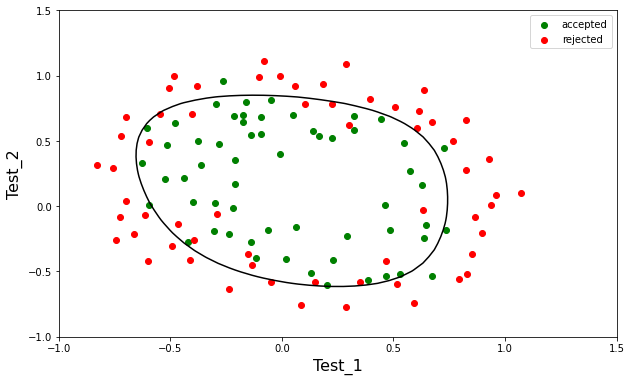

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.scatter(accepted['Test_1'], accepted['Test_2'], c='green', label='accepted')
ax.scatter(rejected['Test_1'], rejected['Test_2'], c='red', label='rejected')
ax.legend()

ax.set_xlabel('Test_1', fontsize=16)
ax.set_ylabel('Test_2', fontsize=16)

plotDecisionBoundary(theta, degree, ax)

Let's compute our training set accuracy

In [29]:
p = predict(theta, X_poly)
p = np.reshape(p, (-1, 1)) 

train_accuracy = np.mean(p == y) * 100
print('Train Accuracy: {train_accuracy}%'.format(train_accuracy=train_accuracy))

Train Accuracy: 79.66101694915254%
